## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [47]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
from shapely.geometry import Point
import descartes
import sweetviz as sv
import folium                                                       # For plotting on a map
import folium.plugins as plugins                                    # For additional features when plotting on a map
%matplotlib inline

In [48]:
df = pd.read_csv("data/kc_house_data.csv")

In [49]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [54]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [5]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

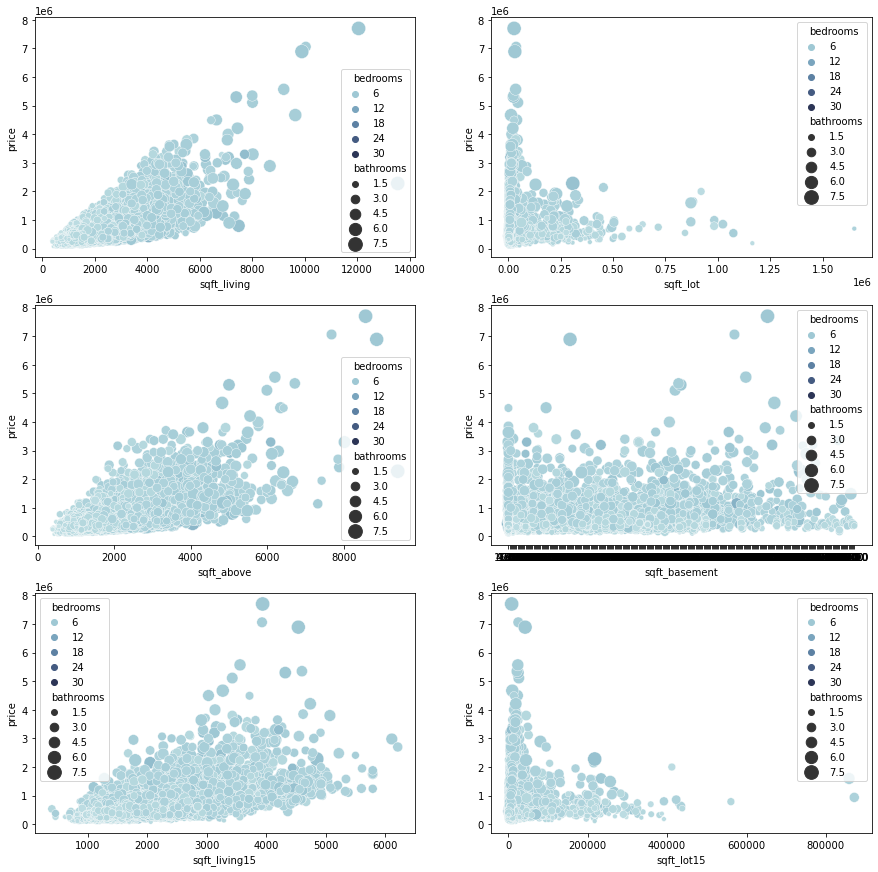

In [6]:
#set visual and style aspects
f, axes = plt.subplots(3, 2, figsize=(15, 15), sharex=False)
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)


ax1 = sns.scatterplot(x="sqft_living", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[0,0]);
ax1.set_xlabel("sqft_living")

sns.scatterplot(x="sqft_lot", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[0,1]);

sns.scatterplot(x="sqft_above", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[1,0]);

sns.scatterplot(x="sqft_basement", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[1,1]);

sns.scatterplot(x="sqft_living15", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[2,0]);

sns.scatterplot(x="sqft_lot15", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[2,1]);

In [7]:
my_report = sv.analyze(df,'price')
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
df = df[df['yr_renovated'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17755 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17755 non-null  int64  
 1   date           17755 non-null  object 
 2   price          17755 non-null  float64
 3   bedrooms       17755 non-null  int64  
 4   bathrooms      17755 non-null  float64
 5   sqft_living    17755 non-null  int64  
 6   sqft_lot       17755 non-null  int64  
 7   floors         17755 non-null  float64
 8   waterfront     15809 non-null  object 
 9   view           17704 non-null  object 
 10  condition      17755 non-null  object 
 11  grade          17755 non-null  object 
 12  sqft_above     17755 non-null  int64  
 13  sqft_basement  17755 non-null  object 
 14  yr_built       17755 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        17755 non-null  int64  
 17  lat            17755 non-null  float64
 18  long  

In [9]:
df = df[df.yr_renovated != 0.00]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 1 to 20946
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             744 non-null    int64  
 1   date           744 non-null    object 
 2   price          744 non-null    float64
 3   bedrooms       744 non-null    int64  
 4   bathrooms      744 non-null    float64
 5   sqft_living    744 non-null    int64  
 6   sqft_lot       744 non-null    int64  
 7   floors         744 non-null    float64
 8   waterfront     652 non-null    object 
 9   view           743 non-null    object 
 10  condition      744 non-null    object 
 11  grade          744 non-null    object 
 12  sqft_above     744 non-null    int64  
 13  sqft_basement  744 non-null    object 
 14  yr_built       744 non-null    int64  
 15  yr_renovated   744 non-null    float64
 16  zipcode        744 non-null    int64  
 17  lat            744 non-null    float64
 18  long    

In [11]:
df.drop(['sqft_lot', 'floors','waterfront','view','grade','sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15'], axis=1, inplace=True)

In [12]:
df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
1    6414100192  12/9/2014   538000.0         3       2.25         2570   
35   9547205180  6/13/2014   696000.0         3       2.50         2300   
95   1483300570   9/8/2014   905000.0         4       2.50         3300   
103  2450000295  10/7/2014  1090000.0         3       2.50         2920   
125  4389200955   3/2/2015  1450000.0         4       2.75         2750   

    condition  yr_built  yr_renovated  zipcode  
1     Average      1951        1991.0    98125  
35    Average      1930        2002.0    98115  
95    Average      1946        1991.0    98040  
103   Average      1950        2010.0    98004  
125   Average      1914        1992.0    98004

<BarContainer object of 744 artists>

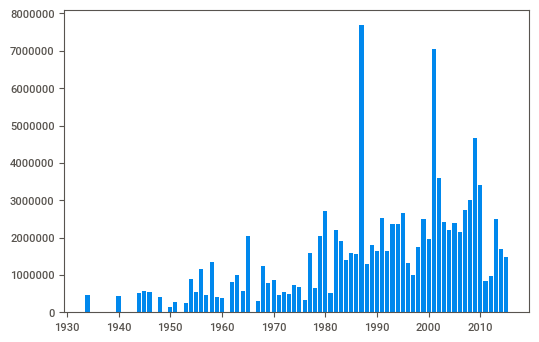

In [13]:
fig,ax = plt.subplots()
ax.bar(df['yr_renovated'], df['price'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 1 to 20946
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            744 non-null    int64  
 1   date          744 non-null    object 
 2   price         744 non-null    float64
 3   bedrooms      744 non-null    int64  
 4   bathrooms     744 non-null    float64
 5   sqft_living   744 non-null    int64  
 6   condition     744 non-null    object 
 7   yr_built      744 non-null    int64  
 8   yr_renovated  744 non-null    float64
 9   zipcode       744 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 63.9+ KB


In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
import statsmodels
from statsmodels.formula.api import ols
from scipy.stats import kurtosis,skew
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler


In [16]:
df_kc = pd.read_csv('data/kc_house_data.csv', index_col='id')

In [17]:
df_kc.drop(['date', 'view', 'sqft_above', 'sqft_basement',  'sqft_living15', 'sqft_lot15'],axis=1, inplace=True)

In [18]:
df_kc=df_kc[df_kc['bedrooms']<=8]

In [19]:
df_kc=df_kc[df_kc['bathrooms']<=5]

In [20]:
df_kc['price'].sort_values(ascending=False)[:50]

id
9808700762    7060000.0
8907500070    5350000.0
3835500195    4490000.0
8106100105    3850000.0
2303900100    3800000.0
7397300170    3710000.0
4217402115    3650000.0
4389201095    3650000.0
2425049063    3640000.0
4114601570    3600000.0
9253900271    3570000.0
2525049148    3420000.0
9362000040    3400000.0
3126059023    3400000.0
1118000320    3400000.0
9808100150    3350000.0
3625059152    3300000.0
1346300150    3300000.0
3625059043    3300000.0
7524900003    3280000.0
7159200005    3200000.0
624069108     3200000.0
1068000375    3200000.0
8964800890    3200000.0
251500080     3200000.0
3025059124    3170000.0
333100295     3120000.0
2424049029    3100000.0
4131900066    3100000.0
3225069065    3080000.0
1732800780    3070000.0
3760500116    3070000.0
1925059254    3000000.0
9808100100    3000000.0
1118000340    3000000.0
3761100045    3000000.0
518500480     3000000.0
8964800330    3000000.0
1370800515    2950000.0
3625049014    2950000.0
6613000930    2950000.0
2524049166   

In [21]:
df_kc=df_kc[df_kc['price']<=800000]

In [22]:
df_kc['yr_renovated']=df_kc['yr_renovated'].replace(to_replace = np.nan, value = 0.0).copy()

In [23]:
df_kc

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                         
7129300520  221900.0         3       1.00         1180      5650     1.0   
6414100192  538000.0         3       2.25         2570      7242     2.0   
5631500400  180000.0         2       1.00          770     10000     1.0   
2487200875  604000.0         4       3.00         1960      5000     1.0   
1954400510  510000.0         3       2.00         1680      8080     1.0   
...              ...       ...        ...          ...       ...     ...   
263000018   360000.0         3       2.50         1530      1131     3.0   
6600060120  400000.0         4       2.50         2310      5813     2.0   
1523300141  402101.0         2       0.75         1020      1350     2.0   
291310100   400000.0         3       2.50         1600      2388     2.0   
1523300157  325000.0         2       0.75         1020      1076     2.0   

           waterfront  condition          grade  yr_built  yr_renovated  \
id                                                                        
7129300520        NaN    Average      7 Average      1955           0.0   
6414100192         NO    Average      7 Average      1951        1991.0   
5631500400         NO    Average  6 Low Average      1933           0.0   
2487200875         NO  Very Good      7 Average      1965           0.0   
1954400510         NO    Average         8 Good      1987           0.0   
...               ...        ...            ...       ...           ...   
263000018          NO    Average         8 Good      2009           0.0   
6600060120         NO    Average         8 Good      2014           0.0   
1523300141         NO    Average      7 Average      2009           0.0   
291310100         NaN    Average         8 Good      2004           0.0   
1523300157         NO    Average      7 Average      2008           0.0   

            zipcode      lat     long  
id                                     
7129300520    98178  47.5112 -122.257  
6414100192    98125  47.7210 -122.319  
5631500400    98028  47.7379 -122.233  
2487200875    98136  47.5208 -122.393  
1954400510    98074  47.6168 -122.045  
...             ...      ...      ...  
263000018     98103  47.6993 -122.346  
6600060120    98146  47.5107 -122.362  
1523300141    98144  47.5944 -122.299  
291310100     98027  47.5345 -122.069  
1523300157    98144  47.5941 -122.299  

[18643 rows x 14 columns]

In [24]:
df_kc["is_renovated"] = np.where(df_kc.yr_renovated == 0, 0, 1)
df_kc["yr_renovated"] = df_kc.yr_renovated.replace(to_replace=0, value=np.nan)

In [25]:
df_kc

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                         
7129300520  221900.0         3       1.00         1180      5650     1.0   
6414100192  538000.0         3       2.25         2570      7242     2.0   
5631500400  180000.0         2       1.00          770     10000     1.0   
2487200875  604000.0         4       3.00         1960      5000     1.0   
1954400510  510000.0         3       2.00         1680      8080     1.0   
...              ...       ...        ...          ...       ...     ...   
263000018   360000.0         3       2.50         1530      1131     3.0   
6600060120  400000.0         4       2.50         2310      5813     2.0   
1523300141  402101.0         2       0.75         1020      1350     2.0   
291310100   400000.0         3       2.50         1600      2388     2.0   
1523300157  325000.0         2       0.75         1020      1076     2.0   

           waterfront  condition          grade  yr_built  yr_renovated  \
id                                                                        
7129300520        NaN    Average      7 Average      1955           NaN   
6414100192         NO    Average      7 Average      1951        1991.0   
5631500400         NO    Average  6 Low Average      1933           NaN   
2487200875         NO  Very Good      7 Average      1965           NaN   
1954400510         NO    Average         8 Good      1987           NaN   
...               ...        ...            ...       ...           ...   
263000018          NO    Average         8 Good      2009           NaN   
6600060120         NO    Average         8 Good      2014           NaN   
1523300141         NO    Average      7 Average      2009           NaN   
291310100         NaN    Average         8 Good      2004           NaN   
1523300157         NO    Average      7 Average      2008           NaN   

            zipcode      lat     long  is_renovated  
id                                                   
7129300520    98178  47.5112 -122.257             0  
6414100192    98125  47.7210 -122.319             1  
5631500400    98028  47.7379 -122.233             0  
2487200875    98136  47.5208 -122.393             0  
1954400510    98074  47.6168 -122.045             0  
...             ...      ...      ...           ...  
263000018     98103  47.6993 -122.346             0  
6600060120    98146  47.5107 -122.362             0  
1523300141    98144  47.5944 -122.299             0  
291310100     98027  47.5345 -122.069             0  
1523300157    98144  47.5941 -122.299             0  

[18643 rows x 15 columns]

In [26]:
df_kc

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                         
7129300520  221900.0         3       1.00         1180      5650     1.0   
6414100192  538000.0         3       2.25         2570      7242     2.0   
5631500400  180000.0         2       1.00          770     10000     1.0   
2487200875  604000.0         4       3.00         1960      5000     1.0   
1954400510  510000.0         3       2.00         1680      8080     1.0   
...              ...       ...        ...          ...       ...     ...   
263000018   360000.0         3       2.50         1530      1131     3.0   
6600060120  400000.0         4       2.50         2310      5813     2.0   
1523300141  402101.0         2       0.75         1020      1350     2.0   
291310100   400000.0         3       2.50         1600      2388     2.0   
1523300157  325000.0         2       0.75         1020      1076     2.0   

           waterfront  condition          grade  yr_built  yr_renovated  \
id                                                                        
7129300520        NaN    Average      7 Average      1955           NaN   
6414100192         NO    Average      7 Average      1951        1991.0   
5631500400         NO    Average  6 Low Average      1933           NaN   
2487200875         NO  Very Good      7 Average      1965           NaN   
1954400510         NO    Average         8 Good      1987           NaN   
...               ...        ...            ...       ...           ...   
263000018          NO    Average         8 Good      2009           NaN   
6600060120         NO    Average         8 Good      2014           NaN   
1523300141         NO    Average      7 Average      2009           NaN   
291310100         NaN    Average         8 Good      2004           NaN   
1523300157         NO    Average      7 Average      2008           NaN   

            zipcode      lat     long  is_renovated  
id                                                   
7129300520    98178  47.5112 -122.257             0  
6414100192    98125  47.7210 -122.319             1  
5631500400    98028  47.7379 -122.233             0  
2487200875    98136  47.5208 -122.393             0  
1954400510    98074  47.6168 -122.045             0  
...             ...      ...      ...           ...  
263000018     98103  47.6993 -122.346             0  
6600060120    98146  47.5107 -122.362             0  
1523300141    98144  47.5944 -122.299             0  
291310100     98027  47.5345 -122.069             0  
1523300157    98144  47.5941 -122.299             0  

[18643 rows x 15 columns]

/Users/jeff/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


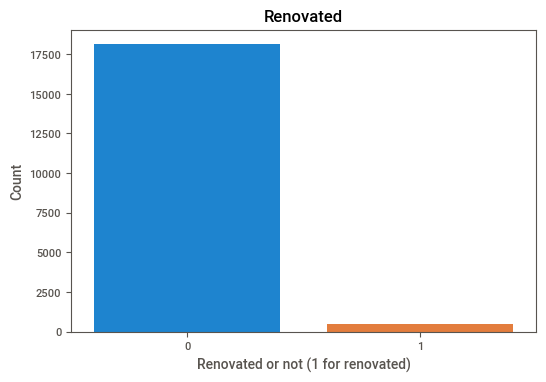

In [27]:
renovate_group = df_kc.groupby(by=["is_renovated"])
renovate_freq = renovate_group.size()
renovate_freq_plot = sns.barplot(renovate_freq.index, renovate_freq.values)
renovate_freq_plot.set(xlabel="Renovated or not (1 for renovated)", ylabel="Count", title="Renovated")
plt.show()

/Users/jeff/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


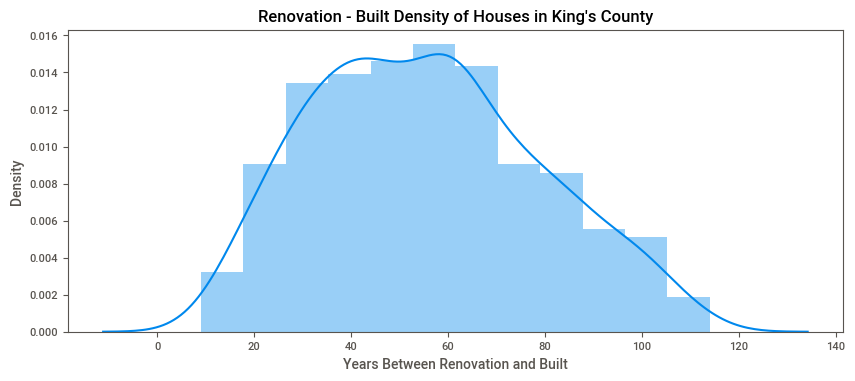

In [28]:
# Distribution of years passed

plt.figure(figsize=(10,4))

renovated = df_kc[df_kc["is_renovated"] == 1]
ren_year_dist = sns.distplot(renovated["yr_renovated"] - renovated["yr_built"])
ren_year_dist.set(xlabel="Years Between Renovation and Built", title="Renovation - Built Density of Houses in King's County")
plt.show()

In [29]:
# Determine price bucket, return integer indicating which bucket
def get_bucket(price):
    if price < 100000:      # Lower
        return 0
    elif price < 300000:    # Lower-med
        return 1
    elif price < 600000:    # Med
        return 2
    elif price < 1000000:   # Upper-med
        return 3
    else:                   # Upper
        return 4

# Given a bucket number, produce the color for use in map
def get_color(bucket):
    if bucket == 0:
        return "red"
    elif bucket == 1:
        return "orange"
    elif bucket == 2:
        return "green"
    elif bucket == 3:
        return "blue"
    else:
        return "purple"

In [30]:
# Filter map 

m = folium.Map(location=[47.5480, -121.9750])

s = df_kc.sample(n=5000)

group1 = plugins.FeatureGroupSubGroup(m, 'Condition 1')
group2 = plugins.FeatureGroupSubGroup(m, 'Condition 2')
group3 = plugins.FeatureGroupSubGroup(m, 'Condition 3')
group4 = plugins.FeatureGroupSubGroup(m, 'Condition 4')
group5 = plugins.FeatureGroupSubGroup(m, 'Condition 5')

m.add_child(group1)
m.add_child(group2)
m.add_child(group3)
m.add_child(group4)
m.add_child(group5)

for j, row in s.iterrows():
    price = row["price"]
    price_bucket = get_bucket(price)
    marker = folium.CircleMarker(row[["lat","long"]],
        radius=5,
        color=get_color(price_bucket),
        popup=price)

    cond = row["condition"]
    if cond == 1:
        group1.add_child(marker)
    elif cond == 2:
        group2.add_child(marker)
    elif cond == 3:
        group3.add_child(marker)
    elif cond == 4:
        group4.add_child(marker)
    else:
        group5.add_child(marker)

folium.LayerControl().add_to(m)

m

In [31]:
df_rv = df_kc
df_rv= df_rv[df_rv.is_renovated != 0]

In [32]:
df_rv

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                         
6414100192  538000.0         3       2.25         2570      7242     2.0   
9547205180  696000.0         3       2.50         2300      3060     1.5   
8029200135  247000.0         3       2.00         1270      7198     1.5   
6300000550  464000.0         6       3.00         2300      3404     2.0   
8096000060  655000.0         2       1.75         1450     15798     2.0   
...              ...       ...        ...          ...       ...     ...   
6392000625  451000.0         2       1.00          900      6000     1.0   
126039256   434900.0         3       2.00         1520      5040     2.0   
4305600360  500012.0         4       2.50         2400      9612     1.0   
3319500628  356999.0         3       1.50         1010      1546     2.0   
1278000210  110000.0         2       1.00          828      4524     1.0   

           waterfront condition          grade  yr_built  yr_renovated  \
id                                                                       
6414100192         NO   Average      7 Average      1951        1991.0   
9547205180         NO   Average         8 Good      1930        2002.0   
8029200135         NO   Average      7 Average      1916        2013.0   
6300000550         NO   Average      7 Average      1920        1994.0   
8096000060        YES   Average      7 Average      1915        1978.0   
...               ...       ...            ...       ...           ...   
6392000625         NO   Average      7 Average      1944        2004.0   
126039256          NO   Average      7 Average      1977        2006.0   
4305600360         NO   Average         8 Good      1962        2009.0   
3319500628        NaN   Average         8 Good      1971        2014.0   
1278000210         NO   Average  6 Low Average      1968        2007.0   

            zipcode      lat     long  is_renovated  
id                                                   
6414100192    98125  47.7210 -122.319             1  
9547205180    98115  47.6827 -122.310             1  
8029200135    98022  47.2086 -121.996             1  
6300000550    98133  47.7067 -122.343             1  
8096000060    98166  47.4497 -122.375             1  
...             ...      ...      ...           ...  
6392000625    98115  47.6855 -122.289             1  
126039256     98177  47.7770 -122.362             1  
4305600360    98059  47.4799 -122.127             1  
3319500628    98144  47.5998 -122.311             1  
1278000210    98001  47.2655 -122.244             1  

[493 rows x 15 columns]

In [41]:
df_rv.reset_index(drop=True, inplace=True)
X = df_rv.drop(['id',"yr_renovated", "is_renovated", "waterfront", "lat", "long"], axis=1)
X

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors condition  \
0    538000.0         3       2.25         2570      7242     2.0   Average   
1    696000.0         3       2.50         2300      3060     1.5   Average   
2    247000.0         3       2.00         1270      7198     1.5   Average   
3    464000.0         6       3.00         2300      3404     2.0   Average   
4    655000.0         2       1.75         1450     15798     2.0   Average   
..        ...       ...        ...          ...       ...     ...       ...   
488  451000.0         2       1.00          900      6000     1.0   Average   
489  434900.0         3       2.00         1520      5040     2.0   Average   
490  500012.0         4       2.50         2400      9612     1.0   Average   
491  356999.0         3       1.50         1010      1546     2.0   Average   
492  110000.0         2       1.00          828      4524     1.0   Average   

             grade  yr_built  zipcode  
0        7 Average      1951    98125  
1           8 Good      1930    98115  
2        7 Average      1916    98022  
3        7 Average      1920    98133  
4        7 Average      1915    98166  
..             ...       ...      ...  
488      7 Average      1944    98115  
489      7 Average      1977    98177  
490         8 Good      1962    98059  
491         8 Good      1971    98144  
492  6 Low Average      1968    98001  

[493 rows x 10 columns]

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        493 non-null    float64
 1   bedrooms     493 non-null    int64  
 2   bathrooms    493 non-null    float64
 3   sqft_living  493 non-null    int64  
 4   sqft_lot     493 non-null    int64  
 5   floors       493 non-null    float64
 6   condition    493 non-null    object 
 7   grade        493 non-null    object 
 8   yr_built     493 non-null    int64  
 9   zipcode      493 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 38.6+ KB
